Arbre de décision

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
import six
from io import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
diabetes_data= pd.read_csv("./DB/diabetes.csv")

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C'est un problème de classification binaire où on va prédire si une personne est malade (1) ou non (0).

<Axes: xlabel='Outcome', ylabel='count'>

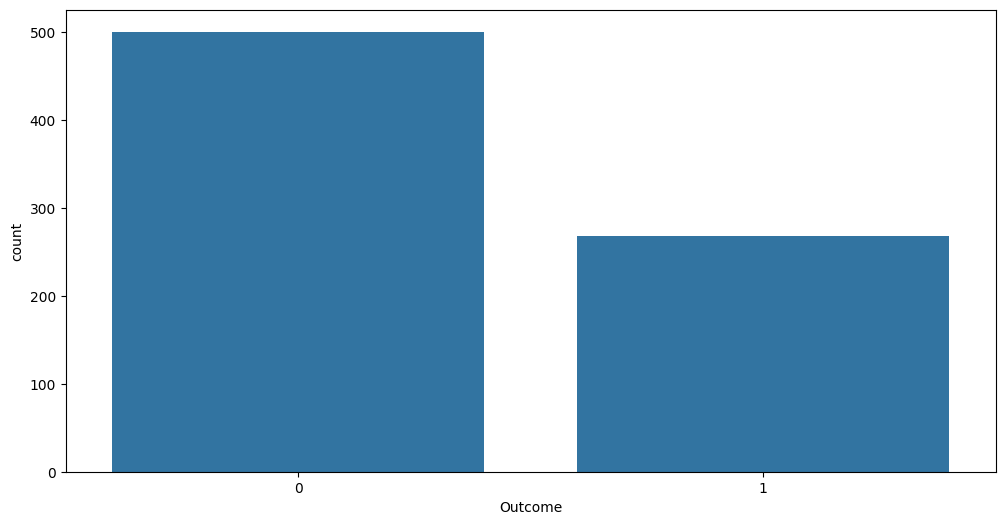

In [5]:
plt.figure(figsize = (12, 6))
sns.countplot(x = "Outcome", data = diabetes_data)

Les données ne sont pas équilibrees -> ceci peut causer des problemes

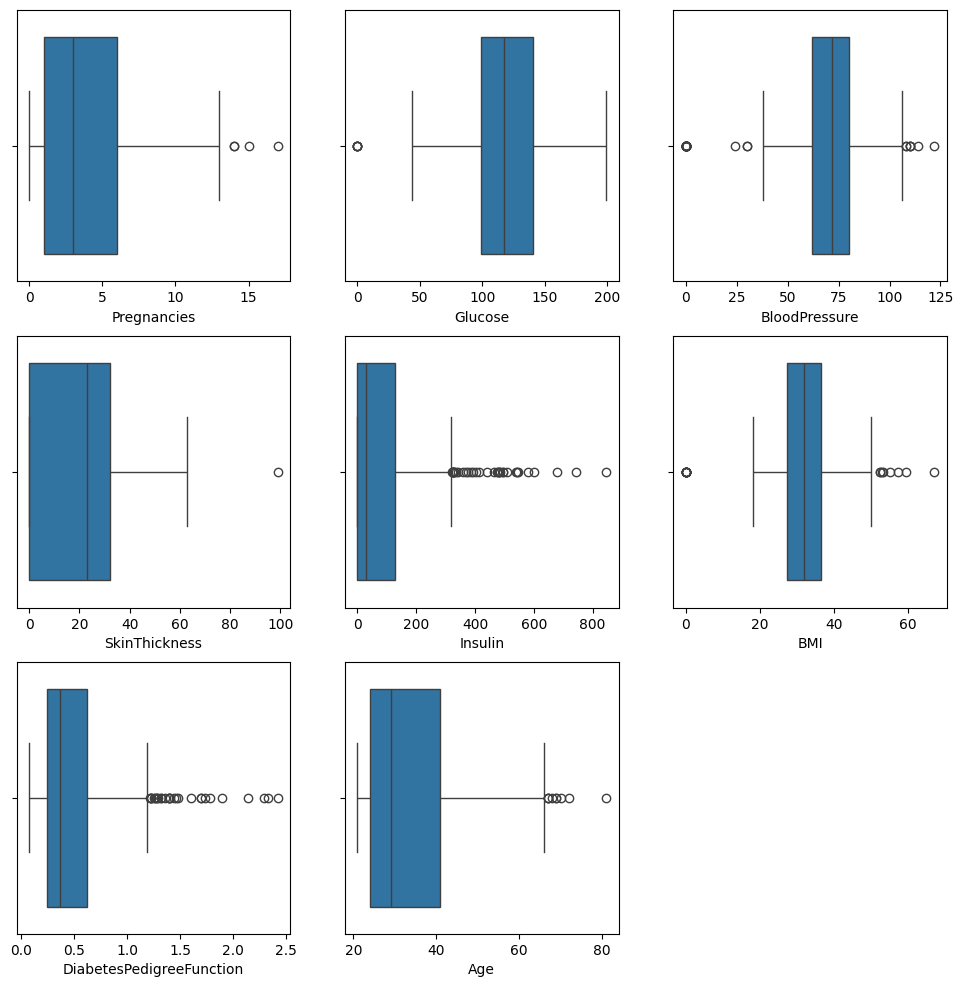

In [6]:
plt.figure (figsize = (12,12))
for i,col in enumerate (['Pregnancies','Glucose','BloodPressure',"SkinThickness",'Insulin','BMI','DiabetesPedigreeFunction','Age']):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = col, data = diabetes_data)

Un boxplot montre la distribution des données pour une variable donnée:
La médiane: la ligne horizontale à l'intérieur de la boîte (valeur centrale de la distribution des données);
Les moustaches: les lignes montrant l'étendue des données;
Les outliers: les points au-dela des moustaches;

In [7]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test) 

Evaluation du modèle

In [10]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7291666666666666


L'accuracy seule ne suffit pas pour évaluer la qualité du modèle car nos classes sont déséquilibrées.

In [11]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[104  26]
 [ 26  36]]


103 => non diabétique prédit non diabétique

36 => diabétique prédit diabétique

27 => non diabétique prédit diabétique

26 => diabétique prédit non diabétique

ceci nous permet de calculer les scores f1, recall ... pour évaluer le modele.

In [12]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.5806451612903226
Recall: 0.5806451612903226
F1-Score: 0.5806451612903226


Les mesures obtenues sont relativement faibles et ceci peut etre dus pour plusieurs raisons: classes désequilibrées, ou le modèle peut etre trop simple pour notre cas. testons un autre modele, logistic regression par exp.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lg = LogisticRegression()
model_lg.fit(X_train_scaled,y_train)
y_pred_lg=model_lg.predict(X_test_scaled)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,y_pred_lg))

The accuracy of the Logistic Regression is 0.8020833333333334


In [14]:
precision = precision_score(y_test, y_pred_lg)
recall = recall_score(y_test, y_pred_lg)
f1 = f1_score(y_test, y_pred_lg)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.75
Recall: 0.5806451612903226
F1-Score: 0.6545454545454545


Les nouvelles mesures sont meilleures mais encore faibles. On aura besoin ig d'équilibrer nos données. (...)

Visualisation de l'arbre de décision

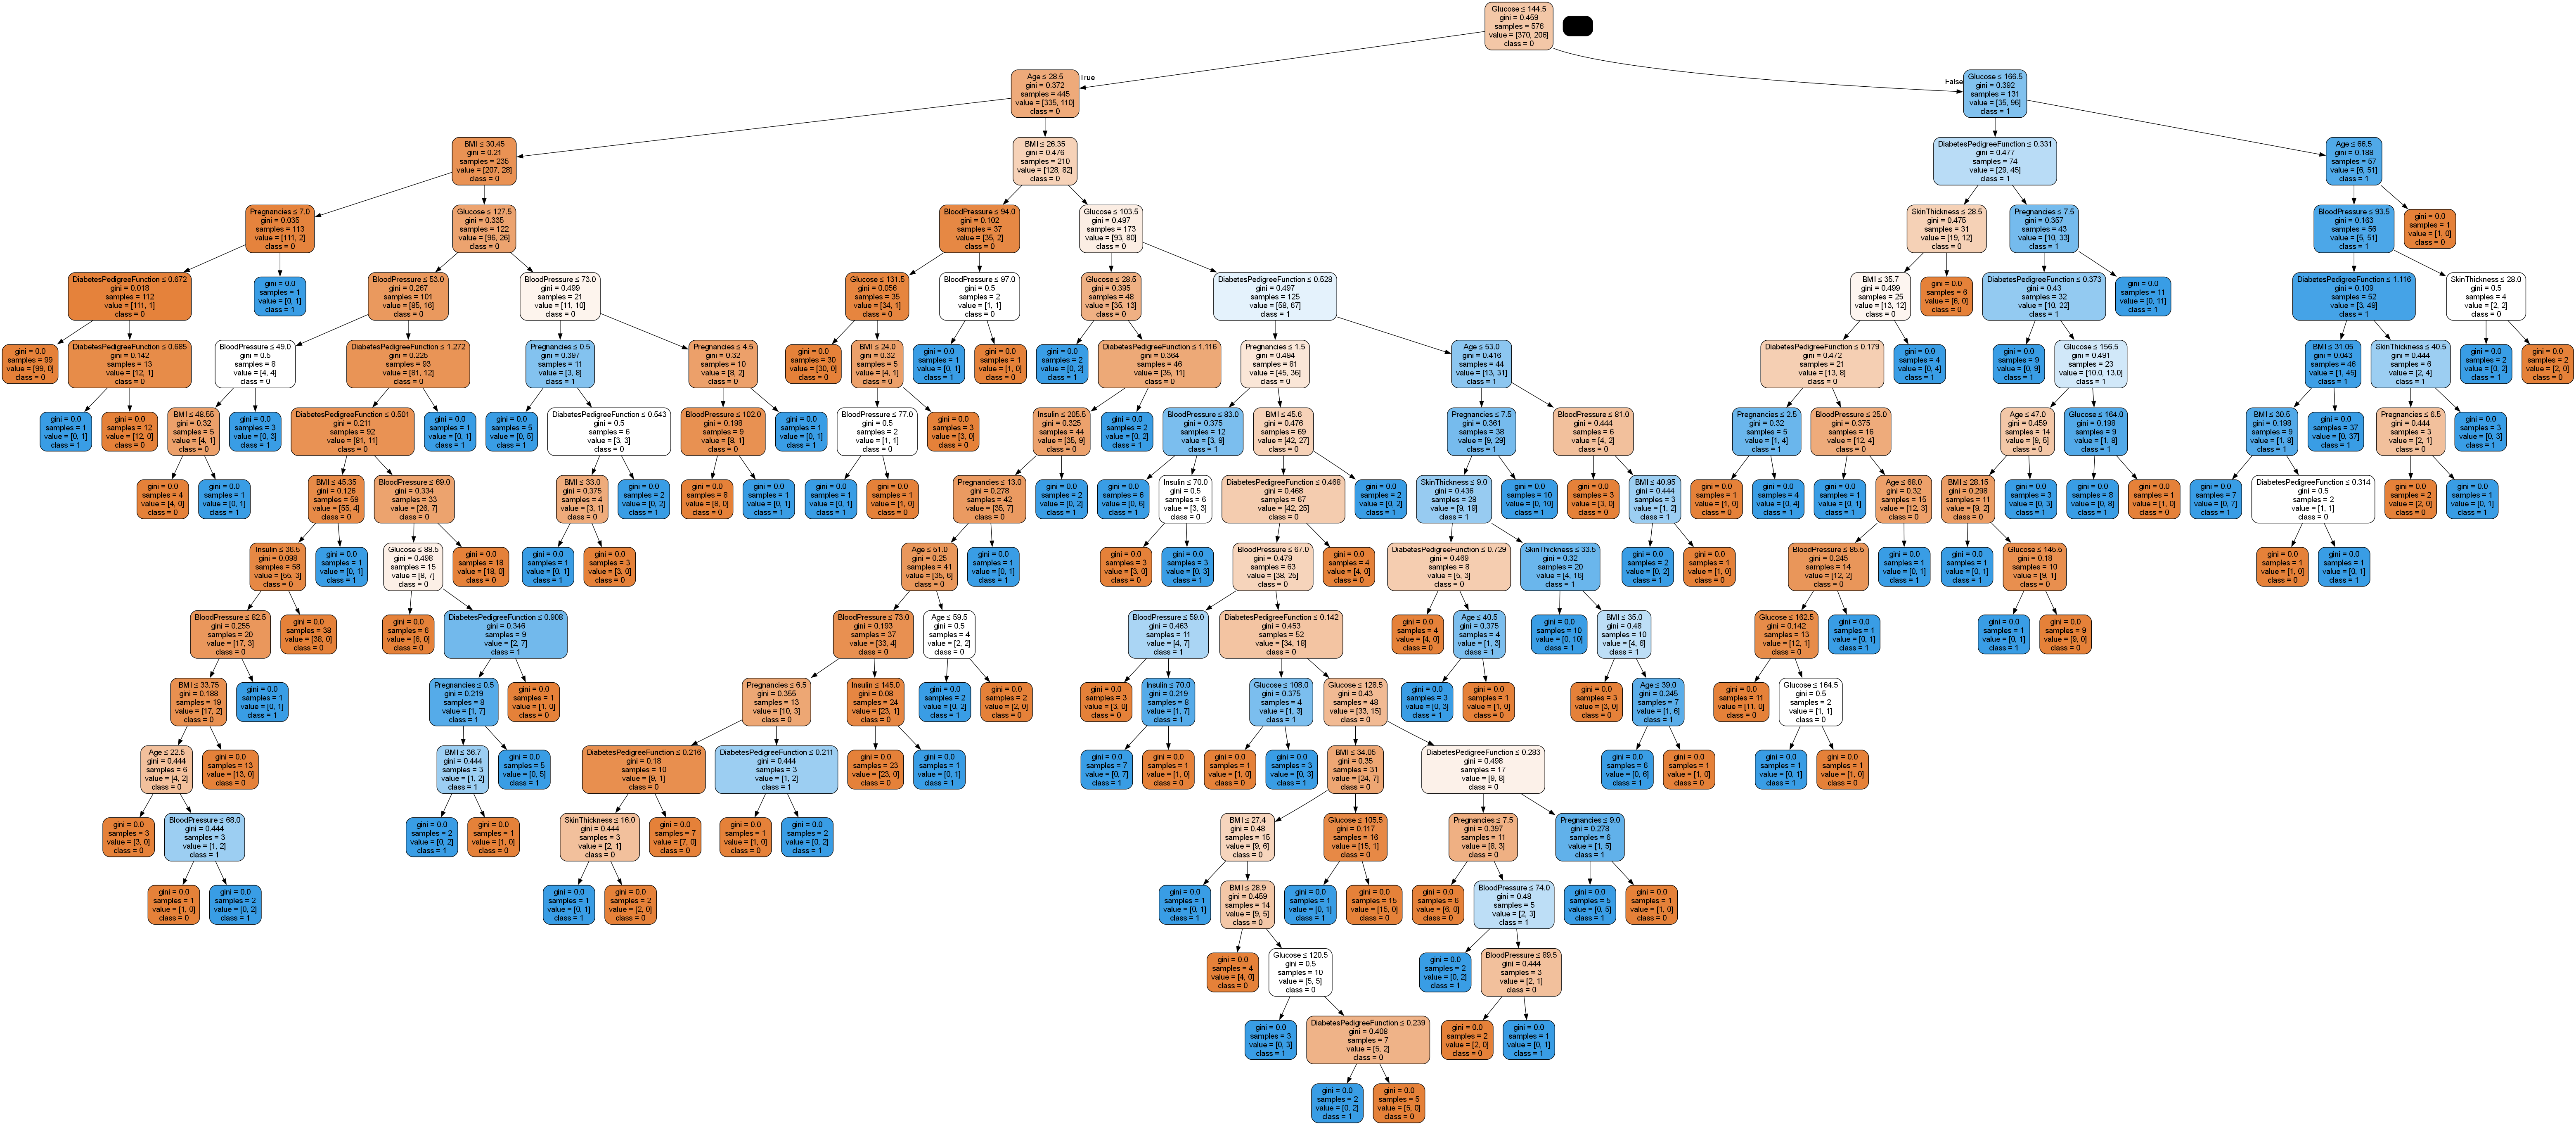

In [16]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True,
 feature_names =diabetes_data.columns[0:8],
 class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png()) 

cet arbre n'est pas élagué, car toutes les feuilles ont un gain de gini nul.

In [19]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_entropy = clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

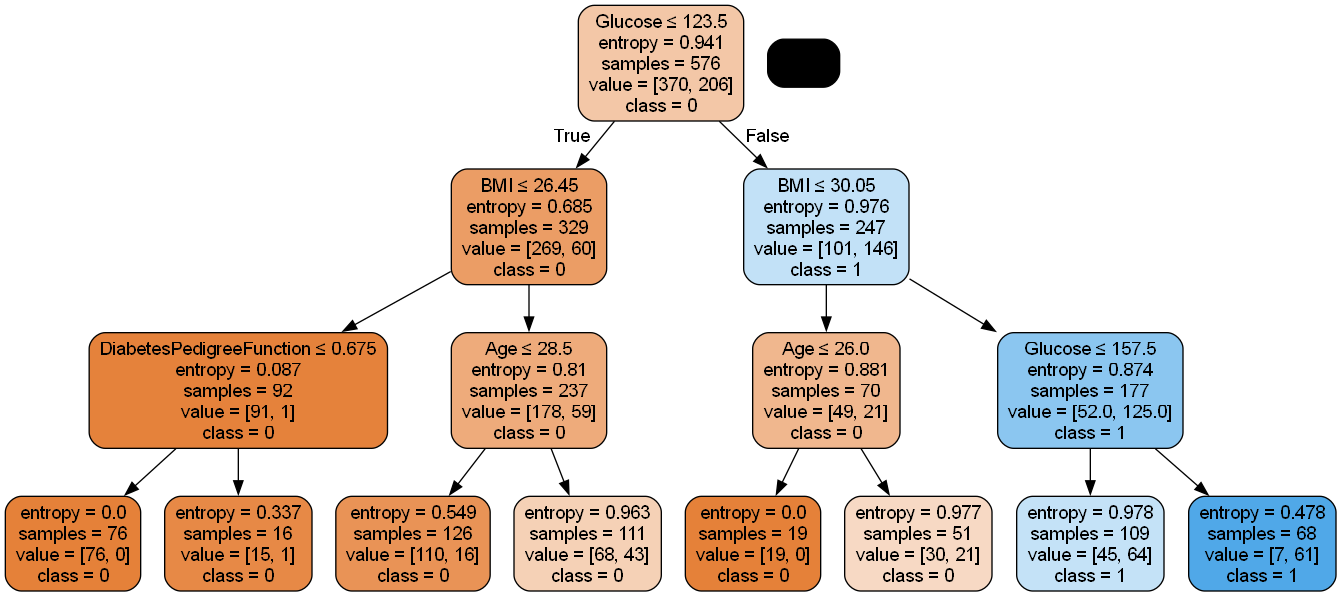

In [20]:
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True,
 feature_names =diabetes_data.columns[0:8],
 class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_entropy.png')
Image(graph.create_png()) 